## Initialization

#### Title:
Sprint 15 Project
Computer Vision

#### Summary:
This project involves computer vision and the use of neural networks in order to solve a regression task
for the Good Seed company.  In this project I will use ResNet 50 and an Image Data Generator in order to create a neural network model that can predict customers' real ages based on customer images/ photos.  This project also includes an EDA section that consists of histograms that display the distribution of customers according age and a section in which I verify the accuracy of customer ages based on photos from the dataset.  

#### Project Description:
The national supermarket chain Good Seed is exploring how Data Science can help ensure compliance with regulations related to the sale of over-the-counter cough syrup, which can contain ingredients that are regulated due to potential misuse. Specifically, they want to prevent sales to individuals under the legal purchase age.
Your task is to evaluate whether a computer vision model can help automate age verification at checkout. As you take on this task, consider the following:
● Checkout areas are equipped with cameras that capture images when someone attempts to purchase OTC cough syrup.
● Computer vision techniques can be used to estimate a person’s age from these images.
● Your job is to build and evaluate a model that predicts age from photos to assist in OTC medication compliance.
To help you get started, you’ll be provided with a dataset of facial images annotated with age labels.

## Initialization

In [1]:
#Import the necessary libraries.
import pandas as pd

import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam 
from PIL import Image

import matplotlib.pyplot as plt 

import seaborn as sns 

import os 

import numpy as np

## Load Data

The dataset is stored in the `/datasets/faces/` folder, there you can find
- The `final_files` folder with 7.6k photos
- The `labels.csv` file with labels, with two columns: `file_name` and `real_age`

Given the fact that the number of image files is rather high, it is advisable to avoid reading them all at once, which would greatly consume computational resources. We recommend you build a generator with the ImageDataGenerator generator. This method was explained in Chapter 3, Lesson 7 of this course.

The label file can be loaded as an usual CSV file.

In [2]:
#Use pd.read_csv() in order to read the csv file and create the labels_df
#dataframe.
labels_df = pd.read_csv('/datasets/faces/labels.csv')

### Findings

In [3]:
labels_df.to_csv('the_labels.csv')

In [4]:
#Use the head() method in order to print the first five rows of the
#labels_df dataframe.
labels_df.head()

,file_name,real_age
0,000000.jpg,4
1,000001.jpg,18
2,000002.jpg,80
3,000003.jpg,50
4,000004.jpg,17


Code Result:
It appears that the columns and rows of the labels_df dataframe have appropriate entries.
There is no need to correct any texts in the rows and columns.

In [5]:
#Use the isna() and sum() methods in order to check for missing values
#in the labels_df dataframe.
labels_df.isna().sum()

file_name    0
real_age     0
dtype: int64

Code Result:
It appears that there are no missing values noted in the columns of the
labels_df dataframe.

In [6]:
#Use the duplicated() and sum() methods in order to check for 
#duplicate values in the labels_df dataframe.
labels_df.duplicated().sum()

0

In [7]:
#Use the .shape method in order to check the dimmensions of the labels_df dataframe.
labels_df.shape

(7591, 2)

Code Result:
The labels_df dataframe contains 7,591 rows (customer entries) and 2 columns.

In [8]:
#Use the info() method in order to check the data types of the columns of the labels_df dataframe.
labels_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7591 entries, 0 to 7590
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  7591 non-null   object
 1   real_age   7591 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 118.7+ KB


Code Result:
It appears that the columns of the labels_df dataframe have the appropriate data types.

In [9]:
#Use the describe() method in order to check the min and and max values of the
#real_age column of the labels_df dataframe.
labels_df.describe()

,real_age
count,7591.000000
mean,31.201159
std,17.145060
min,1.000000
25%,20.000000
50%,29.000000
75%,41.000000
max,100.000000


Code Result:
The minimum value in the real_age column of the labels_df dataframe is: 1,the maximum value of the real_age column is: 100, and the median value of the real_age column is: 29.  This finding indicates that the youngest customer age in the dataset is: 1 years old, the oldest customer age in the dataset is: 100 years olds, and the median or average age of all customers in the dataset is: 29 years old.

## EDA

#### Real Age Histogram

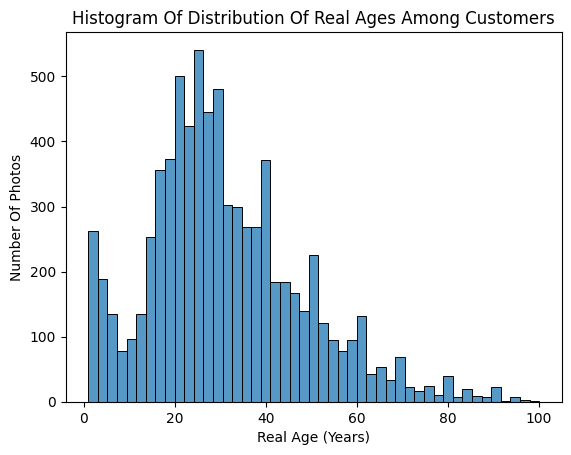

In [10]:
#Use sns.histplot() in order to create a histogram of the distribution of real ages among all customers.
sns.histplot(labels_df['real_age'])

#Use plt.xlabel() in order to label the x axis of the histogram.
plt.xlabel("Real Age (Years)") 

#Use plt.ylabel() in order to label the y axis of the histogram.
plt.ylabel("Number Of Photos")

#Use plt.title() in order to create a title for the histogram.
plt.title("Histogram Of Distribution Of Real Ages Among Customers")

#Use plt.tight_layout() in order to adjust subplot parameters in order to provide a tight
#layout.
plt.tight_layout

#Use plt.show() in order to display the chart.
plt.show()

Histogram Result:
According to the histogram, it appears that the customer age range with the highest count is: approximately 28-30 years old with a number of photos count of: approximately 580 photos.  The customer age range with the lowest number of photos count is: approximately 98-100 years old with a count of: approximately 5 photos.

In [11]:
#### Age Group Distribution Countplot

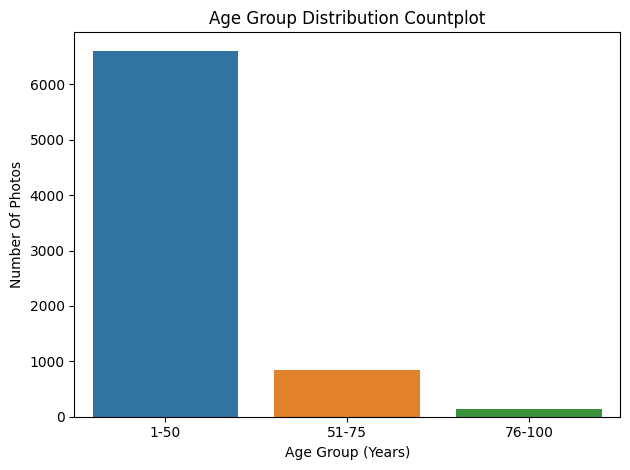

In [12]:
#Specify the bins for the countplot.
bins = [0, 50, 75, 100]
#Specify the age group ranges for the countplot.
labels = ['1-50', '51-75', '76-100'] 

#Use pd.cut() in order to create a column that consists of entries with discrete bin values.s
labels_df['age_group'] = pd.cut(labels_df['real_age'], bins=bins, labels=labels, right=True)

#Use sns.countplot() in order to create a countplot for the data.
sns.countplot(data=labels_df, x='age_group', order=labels)

#Use plt.xlabel() in order to label the x axis of the countplot.
plt.xlabel("Age Group (Years)")

#Use plt.xlabel() in order to label the y axis of the countplot.
plt.ylabel("Number Of Photos")

#Use plt.title() in order to create a title for the countplot.
plt.title("Age Group Distribution Countplot")

#Use plt.tight_layout() in order to adjust the subplot parameters in order to provide
#a tight layout for the countplot.
plt.tight_layout()

#Use plt.show() in order to display the countplot.
plt.show()

Countplot Results:
It appears that customer age group with the highest count is: 1-50 years old, with a number of photos count of: approximately 6,800 photos.
The age group with the second highest count is: 51-75 years, with a number  of
photos count of: approximately 800 photos.  The customer age group with the lowest number of photos count is: 76-100, with a count of: approximately 100 photos.

#### Image/ Photo Verification

Rationale:
In the cells below, I will print the photos of customers with: minimum (youngest), median (average), and maximum s(oldest) age values in order to ensure that the images have match the age label.

##### Minimum Age Customer Image/ Photo Verification

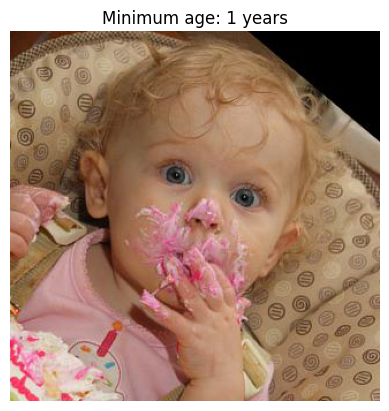

In [13]:
# Use the loc() and idxmin() functions in order index the row with the minimum age value.
min_age_row = labels_df.loc[labels_df['real_age'].idxmin()]
#Create a variable that stores the filename for the customer with the minimum age value.
min_age_filename = min_age_row['file_name']

#Use os.path.join() in order to create a full file path by joining the directory folder path with the 
#customer file name.
min_image_path = os.path.join('/datasets/faces/final_files/', min_age_filename)

#Use Image.open() in order to load the image.
min_image = Image.open(min_image_path)

#Use plt.imshow() in order to display the image.
plt.imshow(min_image)

#Use plt.title() in order to give the image an appropriate title.
plt.title(f"Minimum age: {min_age_row['real_age']} years")

#Use plt.axis() in order to set the axis as 'off' in order to not display the axes.
plt.axis('off')  

#Use plt.show() in order to display the image without the axes.
plt.show()

Code Result:
It appears that the customer's age entry is appropriated based on the image displayed.

##### Median Age Customer Image/ Photo Verification

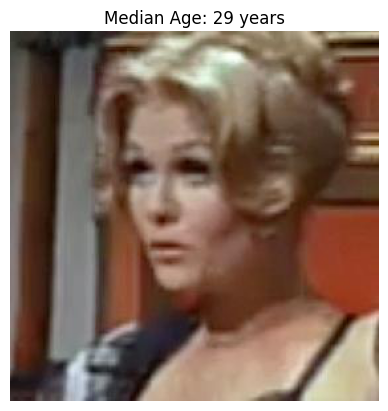

In [14]:
#Use the median() method in order to get the median age for all customers.
median_age = labels_df['real_age'].median()   
#Use conditional filtering and the .index method in order to get the index
#of customers with the median age.
median_indices = labels_df[labels_df['real_age'] == median_age].index 
#Use the .loc method in order to get the rows from the dataset with age entries equal to the
#calulated median age.
median_age_row = labels_df.loc[median_indices] 
#Use the .iloc method in order to get the first image from the median_age_row column.
median_age_filename = median_age_row['file_name'].iloc[0] 

#Use os.path.join() in order to create a full file path by joining the directory folder path with the 
#customer file name. 
image_path_median = os.path.join('/datasets/faces/final_files', median_age_filename) 

#Use Image.open() in order to load the image. 
image_median = Image.open(image_path_median)

#Use plt.imshow() in order to display the image. 
plt.imshow(image_median)

#Use plt.title() in order to give the image an appropriate title. 
plt.title(f"Median Age: {median_age_row['real_age'].iloc[0]} years")

#Use plt.axis() in order to set the axis as 'off' in order to not display the axes. 
plt.axis('off')

#Use plt.show() in order to display the image without the axes.
plt.show()

Code Result:
It appears that the customer's age entry is appropriated based on the image displayed.

##### Maximum Age Customer Image/ Photo Verification

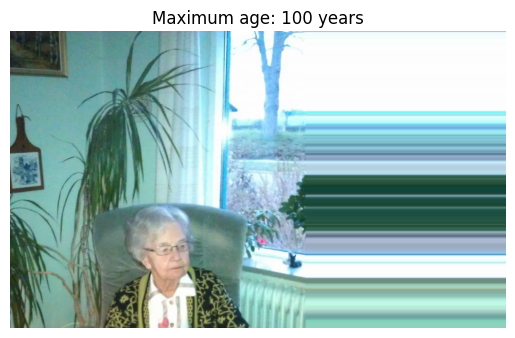

In [15]:
# Use the loc() and idxmax() functions in order index the row with the maximum age value.
max_age_row = labels_df.loc[labels_df['real_age'].idxmax()]
#Create a variable that stores the filename for the customer with the maximum age value.
max_age_filename = max_age_row['file_name'] 

#Use os.path.join() in order to create a full file path by joining the directory folder path with the 
#customer file name. 
image_path_max = os.path.join('/datasets/faces/final_files/', max_age_filename)

#Use Image.open() in order to load the image. 
image_max = Image.open(image_path_max)

#Use plt.imshow() in order to display the image. 
plt.imshow(image_max)

#Use plt.title() in order to give the image an appropriate title. 
plt.title(f"Maximum age: {max_age_row['real_age']} years")

#Use plt.axis() in order to set the axis as 'off' in order to not display the axes. 
plt.axis('off') 
#Use plt.show() in order to display the image without the axes.
plt.show()

Code Result:
It appears that the customer's age entry is appropriated based on the image displayed.

## Modeling

Define the necessary functions to train your model on the GPU platform and build a single script containing all of them along with the initialization section.

To make this task easier, you can define them in this notebook and run a ready code in the next section to automatically compose the script.

The definitions below will be checked by project reviewers as well, so that they can understand how you built the model.

In [16]:
#Create a random seed value.
seed_value = 12345 

#Use np.random.seed() in order to create a random seed.
seed = np.random.seed(seed_value)

In [17]:
#Create a function that loads the training set.
def load_train(path):
    
    """
    #This function uses the ImageDataGenerator() function in order to load the training set, 
    #rescale the images in the training set, and split the data.
    """
    #Use pd.read_csv() in order to create a path to create a dataframe for the labels.csv file.
    labels_split_df = pd.read_csv(path + 'labels.csv')
    
    #Use ImageDataGenerator() in order to create an image data generator in order
    #to upload the image files, split the data, and rescale the images.
    datagen = ImageDataGenerator(validation_split=0.25, rescale=1./255)
    
    #Use the datagen.flow_from_dataframe() method in order to create the training set.
    #Set the class_mode parameter to 'raw' in order to make the data compatible with a 
    #regression task.
    train_gen_flow = datagen.flow_from_dataframe(
        dataframe=labels_split_df,
        directory=path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(150, 150),
        batch_size=16,
        class_mode='raw',
        subset='training',
        seed=seed)

    return train_gen_flow

In [18]:
#Use the previously created load_train() function in order to create the training set.
train = load_train('/datasets/faces/')

Found 5694 validated image filenames.


Code Result:
The training set has been successfully created and the images for the training set have been
successfully uploaded.

In [19]:
#Create a function that loads the test set. 
def load_test(path):
    
    """
    #This function uses the ImageDataGenerator() function in order to load the test set, 
    #rescale the images in the test set, and split the data.
    """
    
    #Use pd.read_csv() in order to create a path to create a dataframe for the labels.csv file.
    labels_split_df = pd.read_csv(path + 'labels.csv')
    
    #Use ImageDataGenerator() in order to create an image data generator in order
    #to upload the image files, split the data, and rescale the images. 
    datagen = ImageDataGenerator(validation_split=0.25, rescale=1./255)
    
    
    #Use the datagen.flow_from_dataframe() method in order to create the test set.
    #Set the class_mode parameter to 'raw' in order to make the data compatible with a 
    #regression task.
    test_gen_flow = datagen.flow_from_dataframe(
        dataframe=labels_split_df,
        directory=path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(150, 150),
        batch_size=16,
        class_mode='raw',
        subset='validation',
        shuffle=False,
        seed=seed)

    return test_gen_flow

In [20]:
#Use the previously created load_test() function in order to create the test set.
test = load_test('/datasets/faces/')

Found 1897 validated image filenames.


Code Result:
The test set has been successfully created and the images for the test set have been
successfully uploaded.

In [21]:
#Create a function the creates the model.
def create_model(input_shape):
    
    """
    This function will create a ResNet model for making predictions on this particular
    regression task. The version of ResNet that this model will be using will be: ResNet50.
    """
    
    #Use ResNet50()in order to create the backbone for model. Set the 
    #include_top parameter to False in order to be able to customize the pooling 
    #layer and the output neuron.
    backbone = ResNet50(
        input_shape=input_shape, weights='imagenet', include_top=False
    )
    
    #Use the Sequential() method in order to initialize the model.
    model = Sequential()
    
    #Use the add() method in order to add the ResNet50() backbone to the model.
    model.add(backbone)
    
    #Use the add() and GlobalAveragePooling2D() in order to add average pooling
    #layer to the model in order to reduce overfitting.
    model.add(GlobalAveragePooling2D())
    
    #Use the add() and Dense() methods in order to add a final Dense or fully connected
    #neural layer that will serve as the final outplut layer for the model.  Set the activation
    #function to 'linear' in order to solve the regression task.
    model.add(Dense(1, activation='relu'))


    return model

In [22]:
#Use the create_model() function in order to create the model. Set the input
#shape for the model to: 150 * 150 pixels with a depth of 3.
model = create_model((150, 150, 3))

2025-11-27 05:21:55.132446: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Code Result:
The model was successfully created.

In [23]:
#Create a function that trains the model, makes predictions using the model, and prints out the model's results.  
#Set the epochs parameter to: 20, the steps_per_epoch paramter to: None, and the validation_steps parameter to: None.
def train_model(model, train_generator, test_generator, epochs=20,
                steps_per_epoch=None, validation_steps=None):

    """
    This function trains the model using the Adam algorithim as an optimizer.  The model also 
    uses mean squared error as the loss function for the optimizer and uses accuracy as the 
    evaluation metric.
    """
    
    #Set the optimizer to Adam() in order to use the Adam algorithim for hyperparameter tuning.
    optimizer = Adam()
    
    #Use the compile() method in order initializes the model's optimizer, loss function and
    #evaluation metric.
    model.compile(optimizer=optimizer,
                 loss='mean_squared_error', 
                 metrics='mean_squared_error')
    
    #Ensure that the steps_per_epoch is equal to the length of the training set if
    #the steps_per_epoch parameter is set to None.
    if steps_per_epoch is None:
        steps_per_epoch = len(train_generator)
    
    #Ensure that the validation_steps is equal to the length of the test set if
    #the validation_steps parameter is set to None.
    if validation_steps is None:
        validation_steps = len(test_generator)

    
    #Use the fit() method in order to customize the model's training process.  Set
    #the verbose parameter to 2 in order to display a full prinout of the model's results
    #after training.
    model.fit(train_generator,
              validation_data=test_generator,
              epochs=epochs,
              steps_per_epoch=steps_per_epoch,
              validation_steps=validation_steps,
              verbose=2,
              shuffle=True)
           
    return model

In [ ]:
#Use the fit() method in order to train the model, make predicitions using the model
#and print the model's results.
trained_model = train_model(model, train, test)

Epoch 1/20


Note/ Rationale:

Because my current computer does not have enough GPU, my model's training results were generated using my remote bootcamp's (TripleTen Tech) GPU system.  In the markdown cell below, I have included the results for the model.

#### ResNet 50 Model Results:
* Epoch 1/20
  356/356 - 35s - loss: 95.3532 - mae: 7.4339 - val_loss: 124.3362 - val_mae: 8.4921
  
* Epoch 2/20
  356/356 - 35s - loss: 76.8372 - mae: 6.6707 - val_loss: 127.6357 - val_mae: 8.6035
  
* Epoch 3/20
  356/356 - 35s - loss: 69.9428 - mae: 6.3992 - val_loss: 91.1531 - val_mae: 7.4454
  
* Epoch 4/20
  356/356 - 35s - loss: 64.4249 - mae: 6.1407 - val_loss: 124.0287 - val_mae: 8.3481
  
* Epoch 5/20
  356/356 - 35s - loss: 52.8486 - mae: 5.5913 - val_loss: 109.1004 - val_mae: 8.2192
  
* Epoch 6/20
  356/356 - 35s - loss: 46.3094 - mae: 5.2223 - val_loss: 85.1038 - val_mae: 7.0332
  
* Epoch 7/20
  356/356 - 35s - loss: 38.2617 - mae: 4.7951 - val_loss: 92.0900 - val_mae: 7.3359
  
* Epoch 8/20
  356/356 - 35s - loss: 37.4804 - mae: 4.7402 - val_loss: 80.0016 - val_mae: 6.7239
  
* Epoch 9/20
  356/356 - 35s - loss: 33.5237 - mae: 4.4271 - val_loss: 83.2579 - val_mae: 6.8529
  
* Epoch 10/20
  356/356 - 35s - loss: 28.5170 - mae: 4.1411 - val_loss: 83.5056 - val_mae: 6.9629
  
* Epoch 11/20
  356/356 - 35s - loss: 27.0142 - mae: 3.9700 - val_loss: 92.1290 - val_mae: 7.1866
  
* Epoch 12/20
  356/356 - 35s - loss: 27.4564 - mae: 4.0428 - val_loss: 185.6307 - val_mae: 11.4591
  
* Epoch 13/20
  356/356 - 35s - loss: 23.7961 - mae: 3.7407 - val_loss: 92.3429 - val_mae: 7.2467
  
* Epoch 14/20
  356/356 - 35s - loss: 24.6167 - mae: 3.8116 - val_loss: 92.4542 - val_mae: 7.1401
  
* Epoch 15/20
  356/356 - 35s - loss: 22.2604 - mae: 3.6746 - val_loss: 82.5822 - val_mae: 6.7841
  
* Epoch 16/20
  356/356 - 35s - loss: 20.1899 - mae: 3.4430 - val_loss: 86.3830 - val_mae: 6.8304
  
* Epoch 17/20
  356/356 - 35s - loss: 17.3425 - mae: 3.2205 - val_loss: 78.4369 - val_mae: 6.6419
  
* Epoch 18/20
  356/356 - 35s - loss: 16.5249 - mae: 3.1295 - val_loss: 81.7731 - val_mae: 6.7226
  
* Epoch 19/20
  356/356 - 35s - loss: 16.6140 - mae: 3.1421 - val_loss: 80.9727 - val_mae: 6.9908
  
* Epoch 20/20
  356/356 - 35s - loss: 17.0187 - mae: 3.1785 - val_loss: 93.4115 - val_mae: 7.6512

#### ResNet 50 Model Conclusion:
According to the results of the model results, the model learns very well on the training data because the MAE on the training set drops from 7.43 to 3.17 and the training loss value drops from 95.35 to 17.02 in 20 epochs.  The validation set results
on the other hand only shows a modest improvement in the MAE and shows a bit of erratic behavior in the validation loss values. The validiation set MAE only drop from 8.49 to the 6.64-7.65 range and flucuates throughout the epochs.  The validation loss overall decreased from 124.33 to 93.41 over 20 epochs which is a modest decrease, but the validation loss values show erratic behavior such as the validation loss spike of 185.63 in Epoch 12.  Overall, the results of both the training and the validation set can suggest some overfitting in the ResNet 50 model because the model's MAE and loss values significantly improve in the
training set, but does not improve or may even worsen during some epochs in the validation set.  The issue is that the model
may make very accurate predicitions on seen data (such as the training set), but the model not make as accurate predictions 
on the unseen data (as seen on the validation set). 

The model may possibly benefit from techniques such as regularization or augmentation.

## Conclusions

Final Conclusions:

* The ResNet 50 model had significantly lower MAE and loss values when making predictions on the the training set, but the model only had a modest decrease in MAE and validation loss when making predictions on the validation set. The model's validation loss also showed erratic behavior and sometimes would get even worse during certain epochs. For example, the model's validation loss showed a spike of: 185.63 in Epoch 12.

* The ResNet 50 model's results may indicate some overfitting. The model seems to make very good predictions on
seen data such as the training set, but the model tends to not make as good predictions on unseen data such as 
the validation set.
  
* Techniques such as: regularization and augmentation may possibly improve the ResNet 50 model's results.
 
* The customer age range with the highest count is: approximately 28-30 years old with a number of photos count of: approximately 580.    
The customer age range with the lowest count is: approximately 98-100 years old with a number of photos count of: approximately 5.
  
* The customer age group with the highest count is: 1-50 years old, with a number of   photos count of: approximately 6,800. The age group with the second highest count is: 51-75 years old, with a count of: approximately 800 photos.  The customer age group with the lowest number of photos count is: 76-100 years old , with a count of: approximately 100 photos.
  
* Mean squared error (MSE) appears to be a better and more suitable loss function than mean absolute error (MAE) because the dataset does not seem uniform and there are outliers noted in the dataset as well.

* The customer with the youngest age in the dataset is: 1 years old and the customer with the oldest age in the dataset is: 100 years old.
 
 * The median (average) customer age in the dataset is: 29 years old.
 
 * According to the image/age verification EDA section, the customer ages seems to be correct according to the customer image/ photo.